<a href="https://colab.research.google.com/github/cij1012/Dacon_study/blob/main/%EC%B2%AD%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/blue house'
train_data = pd.read_csv(path + '/train.csv').iloc[:,1:].dropna(how='any')
train_data.index = range(len(train_data))
test_data = pd.read_csv(path + '/test.csv').iloc[:,1:]
submission = pd.read_csv(path + '/sample_submission.csv')

In [4]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

In [5]:
train_data.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [6]:
test_data.head()

,data
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


# 데이터 전처리

In [7]:
def clean_txt(txt):
    corpus = []
    for i in range(0, len(txt)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(txt[i])) # (1,2,3) 3에있는 1을 2로 대체
        review = re.sub(r'\d+','',str(txt[i])) # 숫자 제거
        review = review.lower() # 소문자
        review = re.sub(r'\s+',' ',review) # 공백 제거
        review = re.sub(r'<[^>]+>','',review) # Html 태그 제거 
        review = re.sub(r'\s',' ',review) # Html 태그 제거후 다시 공백제거
        review = re.sub(r'^\s+','',review) # 첫칸 공백 제거  --- ^ 뒤의 문자로 문자열이 시작
        review = re.sub(r'\s+$','',review) # 마지막칸 공백 제거 --- $ 앞의 문자로 문자열이 종료
        corpus.append(review)
    return corpus
        

In [8]:
train_data.data = clean_txt(train_data.data)
test_data.data = clean_txt(test_data.data)

In [9]:
train_data.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


cleansing string punctuation

In [10]:
"""
개행문자 제거
"""


train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
    train_clear_text.append(str(train_data_text[i]).replace('\\n',''))  
train_data['clear_text'] = train_clear_text
train_data.head()

100%|██████████| 39992/39992 [00:00<00:00, 411676.97it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [11]:
"""
특수문자 제거
"""
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
    temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
    train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


In [12]:
"""
test셋도 마찬가지로
"""
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 5000/5000 [00:00<00:00, 273715.31it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [13]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


# Mecab을 이용하여 토큰화하기
- colab에서 mecab사용할 수 있도록 설치

In [14]:
# !pip install konlpy

In [15]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 33), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [16]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [17]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 460kB 45.5MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-12-17 06:12:19--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downlo

In [18]:
from konlpy.tag import Mecab
mecab = Mecab() # 윈도에서 Mecab 사용하기--https://hong-yp-ml-records.tistory.com/91

In [19]:
"""
mecab.nouns 테스트
"""

mecab.nouns(list(train_data['clear_text'])[9])

['수백만',
 '원',
 '녹',
 '취록',
 '증거',
 '인정',
 '사람',
 '죄',
 '실직',
 '평생',
 '꽃뱀',
 '성매매',
 '범',
 '저',
 '년',
 '개월',
 '간',
 '주민',
 '등록증',
 '변조',
 '신상',
 '위조',
 '피의자',
 '동안',
 '협박',
 '폭행',
 '만남',
 '거부',
 '직장',
 '전화',
 '실직',
 '명',
 '가늠',
 '수',
 '동호인',
 '꽃뱀',
 '성매매',
 '범',
 '허위',
 '사실',
 '동영상',
 '유포',
 '저',
 '꽃뱀',
 '성매매',
 '범',
 '폭행',
 '범',
 '차례',
 '형사',
 '고소',
 '검찰',
 '조사',
 '중',
 '건과',
 '항고',
 '중',
 '건',
 '번',
 '소건',
 '범죄',
 '중',
 '건',
 '모욕죄',
 '기소',
 '제',
 '때',
 '상습',
 '범죄자',
 '피의자',
 '현재',
 '저',
 '위협',
 '목적',
 '제',
 '소속',
 '클럽',
 '밴드',
 '꽃뱀',
 '운운',
 '댓글',
 '게시',
 '정치',
 '인',
 '사',
 '년',
 '모',
 '시장',
 '친구',
 '년',
 '시장',
 '후보',
 '선거',
 '본부',
 '장',
 '현재',
 '민주당',
 '위원장',
 '친분',
 '과시',
 '돈',
 '구장',
 '허위',
 '사실',
 '유포',
 '동호인',
 '증인',
 '매수',
 '친구',
 '동호인',
 '거짓',
 '참고인',
 '진술',
 '등',
 '범죄',
 '방조',
 '저',
 '생각',
 '치',
 '악몽',
 '피의자',
 '목소리',
 '수차례',
 '쉼',
 '눈물',
 '피의자',
 '범죄',
 '수백만',
 '원',
 '녹',
 '취록',
 '증거',
 '제출',
 '증거',
 '저',
 '꽃뱀',
 '성매매',
 '폭행',
 '범',
 '제',
 '제출',
 '녹',
 '취록',
 '자료',
 '증거',
 '인

불용어 처리

In [20]:
stop_df = pd.read_csv(path + '/한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [21]:
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [22]:
stop_words = list(stop_df.형태)

outlier 삭제

In [23]:
ind_list = [24885, 14916, 14605, 6641, 17406, 26957, 2175, 6885, 8947, 14966, 8198, 25955, 39167,21707, 12678,
           3023, 31971, 3730, 37153, 33481, 33369, 12927, 30773, 36431,12373,  37525,27530, 8958, 16884, 18072,
           4478, 7940, 16400, 16656]
train_data = train_data.query('index not in @ind_list')
train_data.index = range(0, len(train_data))

get nouns using Mecab

In [24]:
X_train = []  # dict같은 형태로 저장(?)

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
    temp = []
    temp = mecab.nouns(text[i])
    temp = [word for word in temp if not word in stop_words] # 불용어 제거
    temp = [word for word in temp if len(word) > 1]
    X_train.append(temp)

100%|██████████| 39958/39958 [01:03<00:00, 627.81it/s]


In [25]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
    temp = []
    temp = mecab.nouns(text[i])
    temp = [word for word in temp if not word in stop_words] # 불용어 제거
    temp = [word for word in temp if len(word) > 1]
    X_test.append(temp)

100%|██████████| 5000/5000 [00:08<00:00, 615.35it/s]


# 모델링 - Tokenizer

In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [29]:
threshold = 11  # 역치- 이것보다 많이 나온 단어는 유의미하다...-> 파라미터의 하나가 될 수 있을 듯
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어 개수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

"""
단어 & 빈도수의 쌍을 key 와 value로 받는다.
"""
for key, value in tokenizer.word_counts.items():  ## tokenizer.word_counts -> key 단어 value 빈도수로 구성된 dict
  total_freq = total_freq + value

  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합의 크기: ', total_cnt)
print('등장 빈도수가 %s번 이하인 희귀 단어의 수 : %s'%(threshold-1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율 : ',(rare_cnt/total_cnt))
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ',(rare_freq/total_freq),"%")

단어 집합의 크기:  45144
등장 빈도수가 10번 이하인 희귀 단어의 수 : 32528
단어 집합에서 희귀 단어의 비율 :  0.7205387205387206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  0.0325287181197145 %


In [30]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  12617


In [31]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train) # 입력한 텍스트로부터 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여 - 정수 인코딩
token_X_train = tokenizer.texts_to_sequences(X_train) # 입력으로 들어온 코퍼스에 대해서 단어를 이미 정해진 인덱스로 변환
token_X_test = tokenizer.texts_to_sequences(X_test)

In [32]:
y_train = to_categorical(np.array(train_data['category'])) # one-hot-encoding 카테고리 분류 

"""
[1,0,0]-> 0:인권/성평등
[0,1,0]-> 1:문화/예술/체육/언론
[0,0,1]-> 2:육아/교육

""" 

'\n[1,0,0]-> 0:인권/성평등\n[0,1,0]-> 1:문화/예술/체육/언론\n[0,0,1]-> 2:육아/교육\n\n'

In [33]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1] # 빈 샘플 - 길이가 1보다 작은 데이터의 인덱스값을 저장

In [34]:
# 빈 셈플들 제거하기

del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39933
39933


train_data의 최대 길이 :  5661
train_data의 평균 길이 :  66.62750106428267


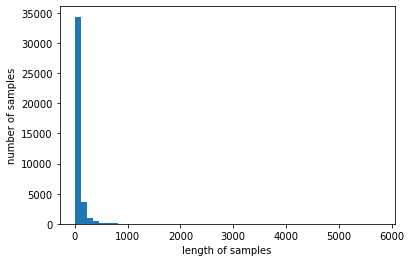

In [35]:
print('train_data의 최대 길이 : ',max(len(I) for I in del_X_train))
print('train_data의 평균 길이 : ',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(l) for l in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test_data의 최대 길이 :  3806
test_data의 평균 길이 :  66.1872


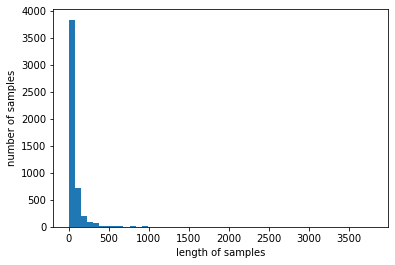

In [36]:
print('test_data의 최대 길이 : ',max(len(I) for I in token_X_test))
print('test_data의 평균 길이 : ',sum(map(len, token_X_test))/len(token_X_test))
plt.hist([len(l) for l in token_X_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
def threshold_check(max_len,nested_list):
  cnt = 0
  for i in nested_list:
    if(len(i)<=max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s'%(max_len, (cnt/len(nested_list))*100))

In [38]:
max_len = 250
threshold_check(max_len, del_X_train)

전체 샘플 중 길이가 250 이하인 샘플의 비율 : 96.07843137254902


In [39]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen= max_len)

# Model 1
- Conv1d

In [40]:
model1 = Sequential()
model1.add(Embedding(vocab_size,64,input_length=max_len))
model1.add(Conv1D(64,5, activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation= 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 64)           807488    
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 64)           20544     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 828,227
Trainable params: 828,227
Non-trainable params: 0
_________________________________________________________________


In [41]:
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy',metrics=['acc'])
reLR = ReduceLROnPlateau(patience=5, verbose=1, factor=.2)
es = EarlyStopping(monitor='val_acc', mode='max',verbose=1,patience=2)
mc = ModelCheckpoint(filepath='1216_1.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True, restore_best_weights = True)

In [ ]:
"""
ReduceLROnPlateau - 모델의 개선이 없을 경우 Learning Rate를 조절해 모델의 개선을 유도하는 콜백함수 ---- https://deep-deep-deep.tistory.com/56

파라미터 설명
factor - Learning rate를 얼마나 감소시킬 지 정하는 인자값. -> 새로운 Learning rate는 기존 lr * factor
patience - Training이 진행됨에도 patience의 n 에폭 동안 값의 개선이 없을 경우 콜백함수 실행
verbose - 0 또는 1, 1 일경우 EarlyStopping이 적용될 때 화면에 적용되었다고 나타냄.
mode - monitor되는 값이 최소가 되어아 하는지 최대가 되어야 하는지 알려주는 인자. 예를 들어 모니터하는 값이 val_acc(정확도)일 경우 값이 클수록 좋기때문에 'max', val_loss일 경우 작을수록 좋기 때문에 'min', 'auto'의 경우 모델이 알아서 판단

EarlyStopping - 모델의 학습이 더이상 진행되지 않을 경우 학습 도중 미리 학습을 종료시키는 콜백함수

파라미터 설명
monitor - EarlyStopping의 기준이 되는 값을 입력, 'val_acc'를 입력할 경우 val_acc가 더이상 증가되지 않을 경우 Earlystopping을 적용
min_delta - 개선된 것으로 간주하기 위한 최소한의 변화량
patience - reLR과 동일
verbose - reLR과 동일
mode - reLR과 동일

ModelCheckpoint - 모델을 저장할때 사용되는 콜백함수

파라미터 설명
filepath - 모델을 저장할 경로를 입력
monitor - 모델을 저장할때 기준이 되는 값
verbose - 1일 경우 모델이 저장될때 저장되었습니다 표시 0 일 경우 표시와 관계없이 모델 저장
save_best_only  - True인 경우 monitor 되고 있는 값을 기준으로 가장 좋은 값으로 모델이 저장, False인 경우 매 에폭마다 모델이 filepath{epoch}으로 저장됨.
"""

In [43]:
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, shuffle=True, validation_split=0.2, verbose=1,callbacks=[es,mc,reLR])

Epoch 1/30
499/500 [============================>.] - ETA: 0s - loss: 0.7898 - acc: 0.7917
Epoch 00001: val_acc improved from -inf to 0.85351, saving model to 1216_1.h5
500/500 [==============================] - 28s 55ms/step - loss: 0.7897 - acc: 0.7917 - val_loss: 0.4866 - val_acc: 0.8535
Epoch 2/30
499/500 [============================>.] - ETA: 0s - loss: 0.4368 - acc: 0.8596
Epoch 00002: val_acc improved from 0.85351 to 0.86378, saving model to 1216_1.h5
500/500 [==============================] - 28s 55ms/step - loss: 0.4368 - acc: 0.8595 - val_loss: 0.4065 - val_acc: 0.8638
Epoch 3/30
499/500 [============================>.] - ETA: 0s - loss: 0.3804 - acc: 0.8702
Epoch 00003: val_acc improved from 0.86378 to 0.86891, saving model to 1216_1.h5
500/500 [==============================] - 28s 55ms/step - loss: 0.3805 - acc: 0.8701 - val_loss: 0.3773 - val_acc: 0.8689
Epoch 4/30
499/500 [============================>.] - ETA: 0s - loss: 0.3535 - acc: 0.8753
Epoch 00004: val_acc did no

In [44]:
model1 = load_model('1216_1.h5') # val_acc: 0.8759

In [45]:
pred1 = model1.predict(pad_X_test)

# Model 2

In [46]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 64)           807488    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 246, 64)           20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 45, 64)            20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)               

In [47]:
 model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath = '1216_2.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = .2, callbacks=callback_ear)

Epoch 1/15
499/500 [============================>.] - ETA: 0s - loss: 0.6921 - acc: 0.7566
Epoch 00001: val_acc improved from -inf to 0.86779, saving model to 1216_2.h5
500/500 [==============================] - 33s 66ms/step - loss: 0.6921 - acc: 0.7566 - val_loss: 0.5624 - val_acc: 0.8678
Epoch 2/15
499/500 [============================>.] - ETA: 0s - loss: 0.4452 - acc: 0.8713
Epoch 00002: val_acc improved from 0.86779 to 0.87692, saving model to 1216_2.h5
500/500 [==============================] - 33s 66ms/step - loss: 0.4451 - acc: 0.8714 - val_loss: 0.4157 - val_acc: 0.8769
Epoch 3/15
499/500 [============================>.] - ETA: 0s - loss: 0.3794 - acc: 0.8882
Epoch 00003: val_acc improved from 0.87692 to 0.88118, saving model to 1216_2.h5
500/500 [==============================] - 33s 67ms/step - loss: 0.3794 - acc: 0.8882 - val_loss: 0.3937 - val_acc: 0.8812
Epoch 4/15
499/500 [============================>.] - ETA: 0s - loss: 0.3387 - acc: 0.8988
Epoch 00004: val_acc did no

In [48]:
model2 = load_model('1216_2.h5') # val_acc: 0.8784

In [49]:
pred2 = model2.predict(pad_X_test)

# Model 3
- LSTM

In [50]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 64)           807488    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 246, 32)           10272     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 242, 32)           5152      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 238, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)               

In [51]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [52]:
callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath = '1216_3.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split= 0.2, verbose=1, shuffle=True, callbacks=callback_ear)

Epoch 1/30
998/999 [============================>.] - ETA: 0s - loss: 0.5773 - acc: 0.7514
Epoch 00001: val_acc improved from -inf to 0.86365, saving model to 1216_3.h5
999/999 [==============================] - 63s 63ms/step - loss: 0.5772 - acc: 0.7515 - val_loss: 0.3676 - val_acc: 0.8637
Epoch 2/30
998/999 [============================>.] - ETA: 0s - loss: 0.3714 - acc: 0.8703
Epoch 00002: val_acc improved from 0.86365 to 0.87530, saving model to 1216_3.h5
999/999 [==============================] - 63s 63ms/step - loss: 0.3713 - acc: 0.8703 - val_loss: 0.3364 - val_acc: 0.8753
Epoch 3/30
998/999 [============================>.] - ETA: 0s - loss: 0.3354 - acc: 0.8818
Epoch 00003: val_acc improved from 0.87530 to 0.87705, saving model to 1216_3.h5
999/999 [==============================] - 63s 63ms/step - loss: 0.3354 - acc: 0.8819 - val_loss: 0.3292 - val_acc: 0.8771
Epoch 4/30
998/999 [============================>.] - ETA: 0s - loss: 0.3107 - acc: 0.8892
Epoch 00004: val_acc did no

In [53]:
model3 = load_model('1216_3.h5') # val_acc: 0.8749

In [54]:
pred3 = model3.predict(pad_X_test)

# Model Ensemble





In [55]:
mean_pred = .3 * pred1 + .4 * pred2 + .3 * pred3

In [56]:
submission.category = np.argmax(mean_pred, axis = -1)

In [61]:
submission.to_csv(path + '/1217.csv', index = False) # score - 0.8804

In [63]:
mean_pred1 = .4 * pred1 + .3 * pred2 + .3 * pred3
submission.category = np.argmax(mean_pred1, axis = -1)
submission.to_csv(path + '/1217_1.csv', index = False) # score - 0.8802